In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
back = pd.read_csv('Bankruptcy.csv')
back.head()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [8]:
y = back['D']
X = back.drop('D', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

In [9]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=24)

In [35]:
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9762169370971326

## Using GridSearch

In [12]:
params = {'max_depth': [2, 5, 7, 10, 13, None], 'min_samples_split': [2, 5, 7, 10, 13], 'min_samples_leaf': [1, 5, 7, 10, 13]} 

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

dtc = DecisionTreeClassifier(random_state=24)

# gcv = GridSearchCV(dtc, param_grid=params, cv=kfold)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
-0.2669900251045717


In [13]:
best_tree = gcv.best_estimator_

pd_imp = pd.DataFrame({'var':list(X.columns), 'imp':best_tree.feature_importances_})
pd_imp.head()

,var,imp
0,NO,1.0
1,YR,0.0
2,R1,0.0
3,R2,0.0
4,R3,0.0


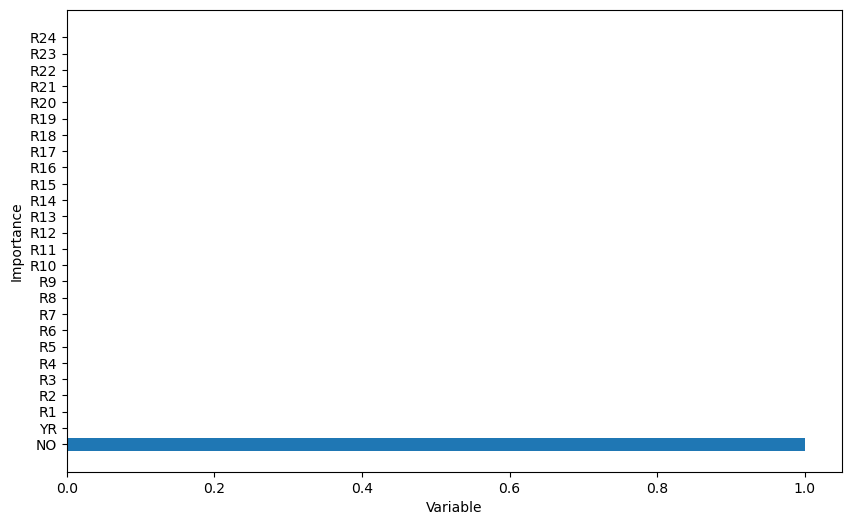

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(pd_imp['var'], pd_imp['imp'])
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.show()